In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

 # Step 1: Import Data

 # Step 2: Perform EDA 
## Questions to answer in the data
### 1. Check number of employee attrition 
### 2. Check number of current employees by business travel
### 3. How many ex employees worked for each job role and which ones are most significant

In [47]:
df = pd.read_csv('HR Data.xlsx - HR data.csv')
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [4]:
df.describe()

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,65.891156,2.729932,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,20.329428,0.711561,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [56]:
df['Education Field'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: Education Field, dtype: int64

In [4]:
#Check number of unique values
df.nunique()

Attrition                        2
Business Travel                  3
CF_age band                      5
CF_attrition label               2
Department                       3
Education Field                  6
emp no                        1470
Employee Number               1470
Gender                           2
Job Role                         9
Marital Status                   3
Over Time                        2
Over18                           1
Training Times Last Year         7
Age                             43
CF_current Employee              2
Daily Rate                     886
Distance From Home              29
Education                        5
Employee Count                   1
Environment Satisfaction         4
Hourly Rate                     71
Job Involvement                  4
Job Level                        5
Job Satisfaction                 4
Monthly Income                1349
Monthly Rate                  1427
Num Companies Worked            10
Percent Salary Hike 

In [6]:
df.duplicated().count()

1470

In [8]:
df.isna().count()

Attrition                     1470
Business Travel               1470
CF_age band                   1470
CF_attrition label            1470
Department                    1470
Education Field               1470
emp no                        1470
Employee Number               1470
Gender                        1470
Job Role                      1470
Marital Status                1470
Over Time                     1470
Over18                        1470
Training Times Last Year      1470
Age                           1470
CF_current Employee           1470
Daily Rate                    1470
Distance From Home            1470
Education                     1470
Employee Count                1470
Environment Satisfaction      1470
Hourly Rate                   1470
Job Involvement               1470
Job Level                     1470
Job Satisfaction              1470
Monthly Income                1470
Monthly Rate                  1470
Num Companies Worked          1470
Percent Salary Hike 

In [10]:
df[df['Gender'] == 'Male'] 

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
5,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-8,8,Male,Laboratory Technician,...,3,3,80,0,8,2,7,7,3,6
7,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-11,11,Male,Laboratory Technician,...,4,2,80,1,1,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [12]:
df[df['Gender'] == 'Female']

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
6,No,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-10,10,Female,Laboratory Technician,...,4,1,80,3,12,2,1,0,0,0
11,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-15,15,Female,Laboratory Technician,...,3,4,80,0,10,3,9,5,0,8
15,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-20,20,Female,Manufacturing Director,...,3,3,80,1,10,3,10,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Yes,Travel_Rarely,45 - 54,Ex-Employees,R&D,Medical,STAFF-1821,1821,Female,Healthcare Representative,...,4,4,80,1,13,4,9,7,3,7
1460,Yes,Travel_Rarely,45 - 54,Ex-Employees,Sales,Life Sciences,STAFF-1869,1869,Female,Sales Executive,...,4,3,80,3,14,3,8,7,0,7
1462,Yes,Non-Travel,35 - 44,Ex-Employees,R&D,Life Sciences,STAFF-1458,1458,Female,Laboratory Technician,...,4,2,80,0,11,4,1,0,0,0
1463,Yes,Travel_Rarely,25 - 34,Ex-Employees,Sales,Medical,STAFF-1489,1489,Female,Sales Executive,...,4,3,80,0,16,4,15,9,10,10


In [58]:
#Only 572 employees had their bachelors
df['Education'].value_counts()

Bachelor's Degree    572
Master's Degree      398
Associates Degree    282
High School          170
Doctoral Degree       48
Name: Education, dtype: int64

<AxesSubplot: >

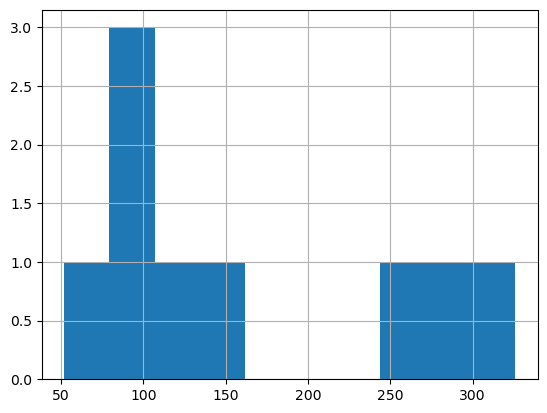

In [63]:
df['Job Role'].value_counts().

In [24]:
#Check number of employee attrition label by performance rating
df[(df['CF_attrition label'] == 'Ex-Employees') & (df['Performance Rating'] == 3)]

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
14,Yes,Travel_Rarely,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-19,19,Male,Laboratory Technician,...,3,2,80,0,6,3,4,2,0,3
24,Yes,Travel_Rarely,25 - 34,Ex-Employees,R&D,Medical,STAFF-31,31,Male,Research Scientist,...,3,3,80,0,8,3,4,2,1,3
33,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Technical Degree,STAFF-42,42,Male,Sales Representative,...,3,3,80,1,19,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Medical,STAFF-1645,1645,Male,Sales Executive,...,3,4,80,2,7,2,2,2,2,2
1455,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Marketing,STAFF-1733,1733,Male,Sales Executive,...,3,2,80,3,16,3,2,2,2,2
1456,Yes,Travel_Rarely,45 - 54,Ex-Employees,Sales,Life Sciences,STAFF-1968,1968,Male,Sales Executive,...,3,2,80,0,15,2,2,2,2,2
1457,Yes,Travel_Rarely,25 - 34,Ex-Employees,Sales,Marketing,STAFF-1862,1862,Male,Sales Executive,...,3,3,80,0,7,2,2,2,2,2


# Perform Data Manipulation 

In [53]:
#Change Y variable to binary data for binary classification
df['Attrition'] = df['Attrition'].replace({'Yes':1,'No':0})
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,0,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,0,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,0,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,1,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,1,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,1,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [54]:
df['CF_age band']

0        35 - 44
1        45 - 54
2        35 - 44
3        25 - 34
4        25 - 34
          ...   
1465     25 - 34
1466     25 - 34
1467     35 - 44
1468    Under 25
1469    Under 25
Name: CF_age band, Length: 1470, dtype: object